In [1]:
import pandas as pd
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from prince import MCA
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#data = pd.ExcelFile('FunctionalitiesTFG_v3.xlsx')
data = pd.ExcelFile('FunctionalitiesTFG_v3.xlsx')
mca_data = pd.read_excel(data, 'MCA')
pca_data = pd.read_excel(data, 'PCA')

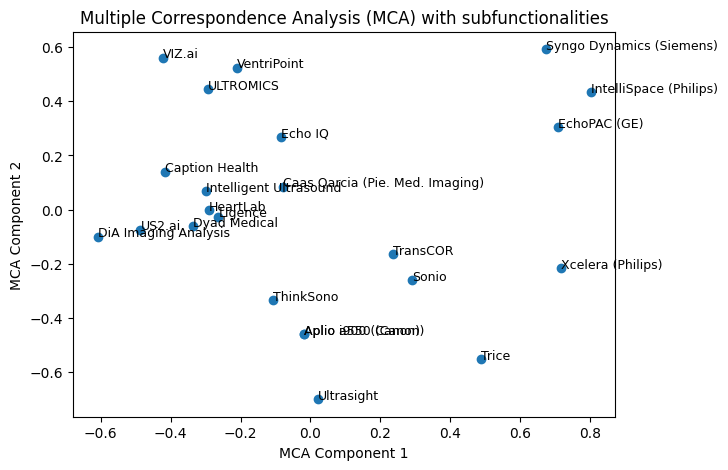

In [3]:
# Create MCA object
mca = MCA()
# Fit MCA to the data
mca.fit(mca_data)
# Transform the data
mca_coordinates = mca.transform(mca_data)

# Scatter plot of MCA coordinates
plt.figure(figsize=(7, 5))
plt.scatter(mca_coordinates.iloc[:, 0], -mca_coordinates.iloc[:, 1])

# Add labels to points
for i, competitor in enumerate(mca_data['Unnamed: 0']):
    plt.text(mca_coordinates.iloc[i, 0], -mca_coordinates.iloc[i, 1], competitor, fontsize=9)

# Set plot title and labels
plt.title('Multiple Correspondence Analysis (MCA) with subfunctionalities')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')

# Display the plot
plt.grid(False)
plt.show()



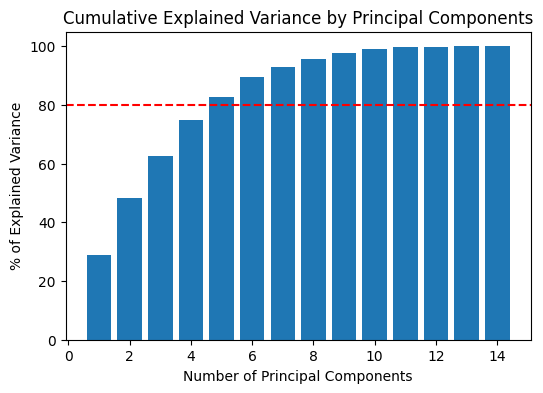

In [4]:
pca=PCA()
pca.fit(pca_data)
pca.explained_variance_ratio_
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Plot the explained variance ratio (assuming pca.explained_variance_ratio_ is an array)
plt.bar(range(1, 15), pca.explained_variance_ratio_.cumsum() * 100, label='Explained Variance (%)')

# Define the y-axis value for the threshold line (80%)
threshold = 80

# Add a red dashed line at the threshold
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{threshold}% Threshold')

# Customize the plot
plt.ylabel('% of Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance by Principal Components')


plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

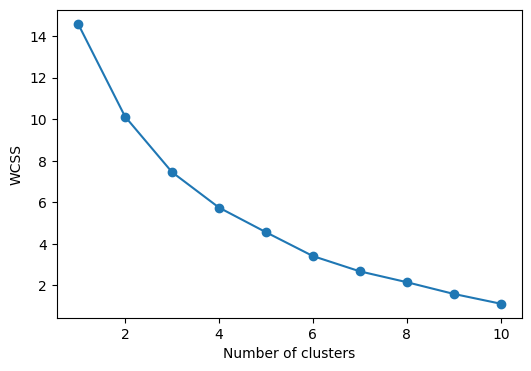

In [5]:
pca=PCA(n_components=4)
pca.fit(pca_data)

pca.transform(pca_data)
scores_pca = pca.transform(pca_data)

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans_pca= KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss,marker='o')
plt.ylabel('WCSS')
plt.xlabel('Number of clusters')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


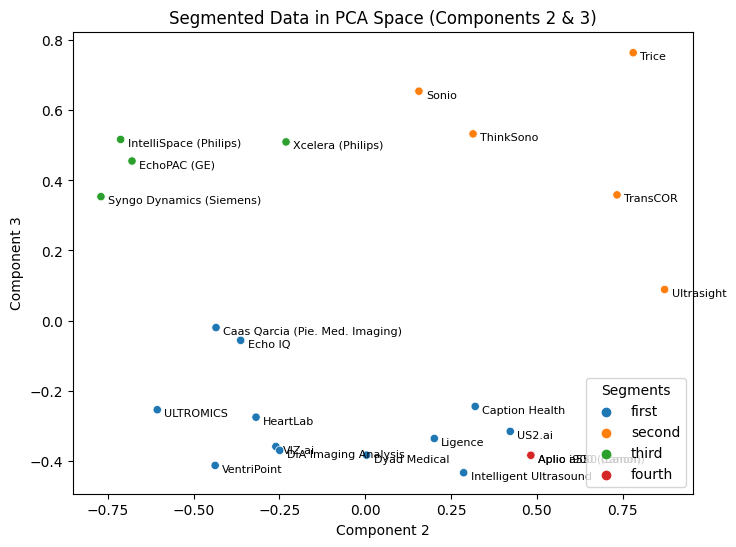

In [6]:
kmeans_pca= KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
df_segm_pca_kmeans=pd.concat([pca_data.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-5: ]=['Component 1','Component 2','Component 3','Component 4','Component 5']
df_segm_pca_kmeans['Segment KMeans PCA']=kmeans_pca.labels_

df_segm_pca_kmeans['Segments'] = df_segm_pca_kmeans['Segment KMeans PCA'].map({0:'first',1:'second',2:'third',3:'fourth'})
import seaborn as sns
import matplotlib.pyplot as plt

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']

label_column = mca_data['Unnamed: 0']  # Replace with your column name

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segments'])

# Loop through data and annotate points
for i, (x, y, label) in enumerate(zip(x_axis, y_axis, label_column)):
  plt.annotate(label, (x, y), xytext=(5, -5), textcoords='offset points', fontsize=8)  # Adjust offset and fontsize as needed

plt.title('Segmented Data in PCA Space (Components 2 & 3)')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.show()

/var/folders/lk/2f544m5x6pvbr5ktm_xknjw40000gn/T/ipykernel_16761/1624128529.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_axis, y_axis, z_axis, c=color_list, cmap='viridis')  # Color by segments using color_list


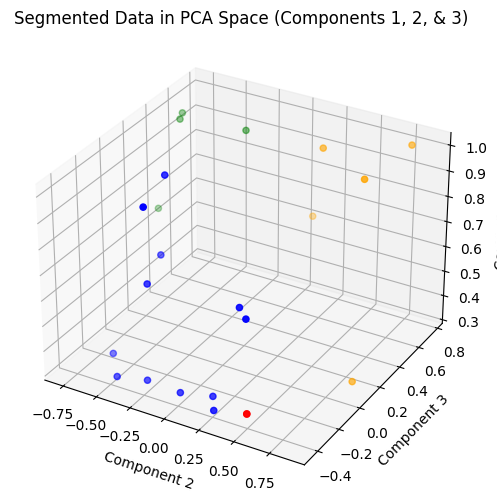

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import seaborn as sns
import matplotlib.pyplot as plt

segment_colors = {
    "first": "blue",  # Map segment label to color name
    "second": "orange",
    "third": "green",
    "fourth": "red"
    # ... Add more mappings for other segments
}


x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
z_axis = df_segm_pca_kmeans['Component 1']
label_column = mca_data['Unnamed: 0']  # Replace with your column name (optional)

fig = plt.figure(figsize=(8, 6))  # Create a figure

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Assuming a dictionary 'segment_colors' maps numerical values to color names
color_list = [segment_colors[value] for value in df_segm_pca_kmeans['Segments']]
ax.scatter(x_axis, y_axis, z_axis, c=color_list, cmap='viridis')  # Color by segments using color_list

# Optional: Add labels for points (Caution for large datasets)
# for i, (x, y, z, label) in enumerate(zip(x_axis, y_axis, z_axis, label_column)):
#     ax.text(x, y, z, label, size=8)  # Adjust offset and fontsize as needed

# Customize the plot
ax.set_title('Segmented Data in PCA Space (Components 1, 2, & 3)')
ax.set_xlabel('Component 2')
ax.set_ylabel('Component 3')
ax.set_zlabel('Component 1')
plt.show()